# Trabalho 01 - Aquecimento

Aluno: Mathews Edwirds <br>
Matrícula: 201765503AB

A caracterização da carga é uma etapa essencial para um estudo de desempenho. Neste trabalho você deverá aplicar vários conceitos discutidos (ou ainda não) na revisão de probabilidade e estatística para realizar um estudo de caracterização de cargas. Sua tarefa é caracterizar a distribuição de tamanhos de arquivos armazenados na sua área de trabalho. Para tanto, siga os seguintes passos:

    a. Obtenha os tamanhos dos arquivos na sua área de trabalho ou em qualquer diretório que tenha um número representativo de arquivos (entre 1000 e 10000. Não use arquivos demais para evitar problemas com a parte de simulação). No Linux você pode ir para seu diretório e rodar o comando: ls -l -R. Este comando retornará uma lista com todos os arquivos que estão armazenados na árvore de diretórios a partir da raiz. Para cada arquivo, ele retornará várias informações, incluindo o tamanho. Elimine todas as informações desnecessárias (use python, awk, etc) e crie um arquivo somente com os tamanhos, um por linha. Este será o seu arquivo de amostras.

    b. Implemente programas (script awk, python, ou programa C, C++ ou mesmo no excel) para computar as seguintes métricas sobre sua carga: 

        • média <br>
        • variância <br>
        • desvio padrão <br>
        • coeficiente de variabilidade <br>
        • mediana <br>
        • quartis <br>
        • 1°, 10°, 90°, e 99° percentis <br>

    c. Plote a PDF e a CDF da distribuição dos tamanhos dos arquivos
    
    d. Explique e discuta os resultados acima. Quais as conclusões podemos ter? 

# a) Lê os diretórios do sistema e cria um arquivo csv

Referências: <br>
https://geekflare.com/check-file-folder-size-in-python/ <br>
https://careerkarma.com/blog/python-list-files-in-directory/

In [ ]:
import os
import pandas as pd

# Definimos o diretório que será listado e criamos uma lista vazia
path = "F:\\"
dados = []

# Primeiro vamos percorrer todos os arquivos do path escolhido e vamos inserir os dados numa lista
for root, directories, files in os.walk(path, topdown=False):
    for name in files:
        KB = ((os.stat(os.path.join(root, name)).st_size)/1024)
        MB = KB/1024
        try:
            #formato = name.split(".")[1]
            formato = os.path.splitext(name)[1]
        except:
            formato = None
        dados.append([ root, name, formato, MB])

In [ ]:
# Agora vamos criar um dataframe com todos os dados da lista
df = pd.DataFrame(dados, columns = ['directory', 'filename', 'format', 'size (MB)'])

# Removemos do df a pasta do sistema "$RECYCLE.BIN" 
df = df[df["directory"].str.contains(r"RECYCLE") == False] 

# Removemos arquivos duplicados
#df = df.drop_duplicates("filename") 

# Descartamos também os arquivos menores do que 100 KB
df = df[df['size (MB)'] > 0.100]  

# Vamos pegar uma amostra aleatória mas reprodutível de 8000 amostras
df = df.sample(n=4000, random_state=1) 
df

In [ ]:
# Por fim, criamos um csv com todos os dados do dataframe
df.to_csv('system_files.csv', index=False)

# b) Leitura do csv criado anteriormente

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

In [2]:
# Lemos o csv e salvamos em um dataframe
caminhocsv = 'system_files.csv'
df = pd.read_csv(caminhocsv, dtype = {'directory': str, 'filename': str, 'format': str, 'size (MB)':np.float64})
df = pd.DataFrame(df, dtype=str)

# Convertemos os dados das colunas de "size" para float
#df.loc[:,'size (KB)'] = df.loc[:,'size (KB)'].astype(float)
df.loc[:,'size (MB)'] = df.loc[:,'size (MB)'].astype(float)
df

,directory,filename,format,size (MB)
0,F:\Identificação Vacas\Cow Database\imagens\47,263.jpeg,.jpeg,0.498012
1,F:\Backup\Datasets\Downloads\VG100\VG_100K_2,2382262.jpg,.jpg,0.178996
2,F:\Backup\Datasets\Downloads\VG100\VG_100K,2353089.jpg,.jpg,0.109315
3,F:\Backup\Datasets\Downloads\VG100\VG_100K,2348557.jpg,.jpg,0.147605
4,F:\Backup\Datasets\Downloads\VG100\VG_100K,1592615.jpg,.jpg,0.373769
...,...,...,...,...
3995,F:\Backup\Datasets\Downloads\VG100\VG_100K,2343561.jpg,.jpg,0.194731
3996,F:\Identificação Vacas\Cow Database\imagens\71,261.jpeg,.jpeg,0.457378
3997,F:\Backup\Datasets\Downloads\VG100\VG_100K_2,2385763.jpg,.jpg,0.105200
3998,F:\Identificação Vacas\Cow Database\imagens\53,1133.jpeg,.jpeg,0.481571


In [3]:
# Calculo feito "na mão"
print("Média: \n{}".format(df.mean().round(3)))
print("\nVariância: \n{}".format(df.var().round(2)))
print("\nDesvio Padrão: \n{}".format(df.std().round(3)))
print("\nCoeficiente de variabilidade: \n{}".format((df.std()/df.mean()).round(3))) #desvio padrão/média
print("\nMediana: \n{}".format(df.median().round(3)))
print("\nQuartis: \n{}".format(df.quantile([0.25,0.5,0.75,1]).round(3)))
print("\nPercentis: \n{}".format(df.quantile(q=[0.01, 0.1, 0.9, 0.99]).round(3)))

Média: 
size (MB)    0.81
dtype: float64

Variância: 
size (MB)    57.74
dtype: float64

Desvio Padrão: 
size (MB)    7.599
dtype: float64

Coeficiente de variabilidade: 
size (MB)    9.385
dtype: float64

Mediana: 
size (MB)    0.16
dtype: float64

Quartis: 
      size (MB)
0.25      0.127
0.50      0.160
0.75      0.438
1.00    270.220

Percentis: 
      size (MB)
0.01      0.101
0.10      0.111
0.90      0.486
0.99      8.865


In [4]:
# Validação dos dados com o método "describe"
df.describe(percentiles=[0.01, 0.1, 0.9, 0.99, 0.25, 0.5, 0.75, 1]).round(3)

,size (MB)
count,4000.000
mean,0.810
std,7.599
min,0.100
1%,0.101
10%,0.111
25%,0.127
50%,0.160
75%,0.438
90%,0.486


# c) Plotagem da PDF e CDF

## Função densidade de probabilidade - PDF

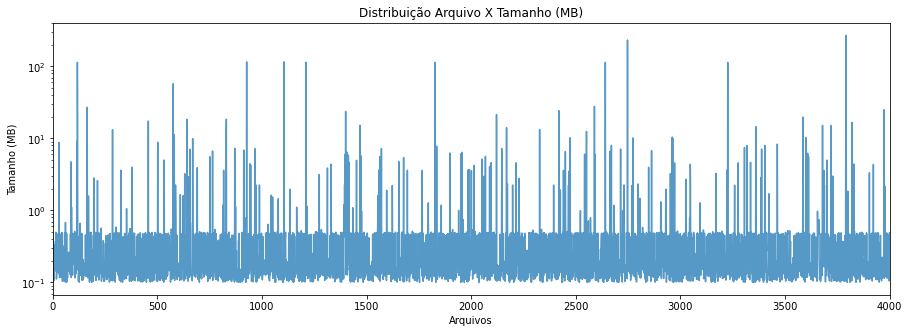

In [5]:
# Inicialmente plotamos a distribuição dos tamanhos dados por arquivo

plt.rcParams["figure.figsize"] = (15,5);

ax = df['size (MB)'].plot(kind='line', logy = True, alpha = 0.75);

plt.title("Distribuição Arquivo X Tamanho (MB)")
plt.xlabel("Arquivos");
plt.ylabel("Tamanho (MB)");

max_x = len(df['size (MB)'])
ax.set_xlim([0, max_x]);

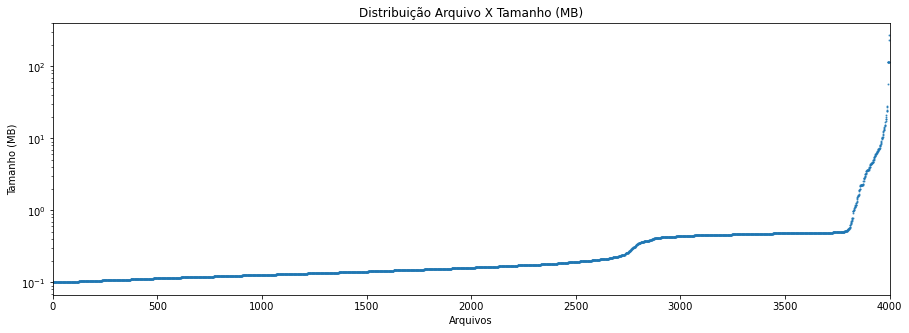

In [6]:
# Depois ordenamos os dados e plotamos a mesma distribuição novamente (lembre-se que essa distribuição é discreta)

ordenado = df.sort_values(by='size (MB)').reset_index()

ax = ordenado['size (MB)'].plot(kind='line', logy = True, alpha = 0.75, marker= '.', linestyle='None', markersize = 2.0);
ax.set_xlim([0, len(ordenado)]);

plt.title("Distribuição Arquivo X Tamanho (MB)")
plt.xlabel("Arquivos");
plt.ylabel("Tamanho (MB)");

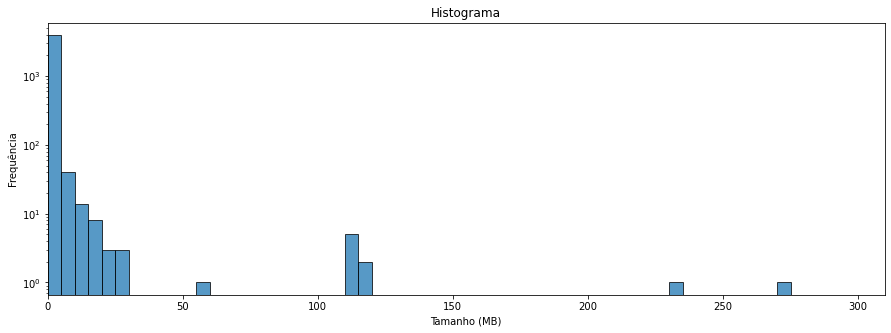

In [7]:
max_y = max(df['size (MB)']) + 0.1 * max(df['size (MB)'])
ax = df['size (MB)'].plot(kind='hist', bins = np.arange(0, max_y, 5), logy = True, alpha = 0.75, edgecolor = "black");

plt.title("Histograma")
plt.xlabel("Tamanho (MB)");
plt.ylabel("Frequência");

ax.set_xlim(left=0);

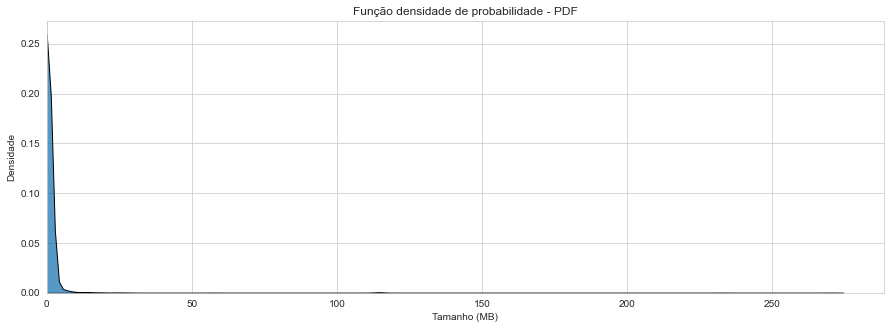

In [8]:
sns.set_style('whitegrid')
ax = sns.kdeplot(df['size (MB)'], shade=True, alpha=0.75, edgecolor = "black");
ax.set_xlim(left=0);

plt.title("Função densidade de probabilidade - PDF")
plt.xlabel("Tamanho (MB)");
plt.ylabel("Densidade");

# Função de distribuição acumulada - CDF

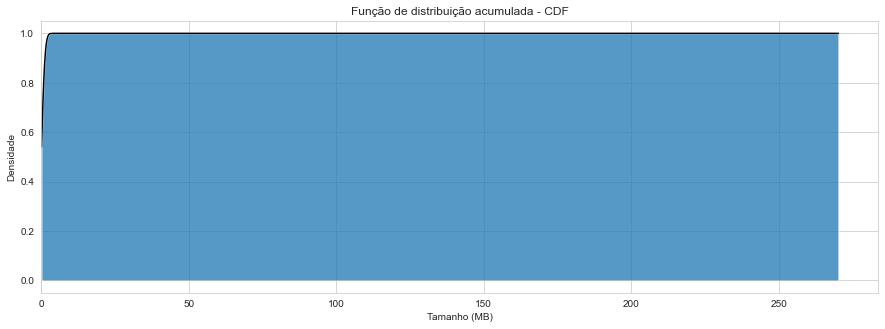

In [33]:
x = np.sort(df['size (MB)'])
y = scipy.stats.norm.cdf(x)

plt.plot(x, y, color='black');
plt.fill_between(x, y, alpha=0.75)
plt.xlim(left=0);

plt.title("Função de distribuição acumulada - CDF")
plt.xlabel("Tamanho (MB)");
plt.ylabel("Densidade");

# Outras análises

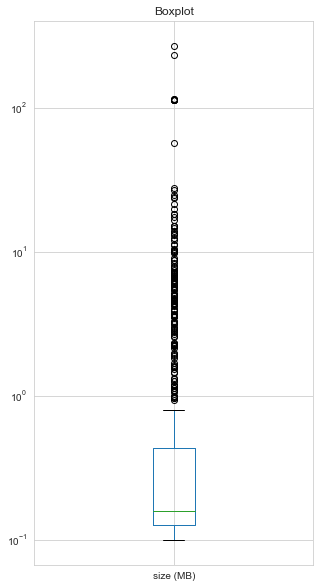

In [12]:
ax = df['size (MB)'].plot(kind='box', logy= True, figsize=(5,10));
plt.title("Boxplot");

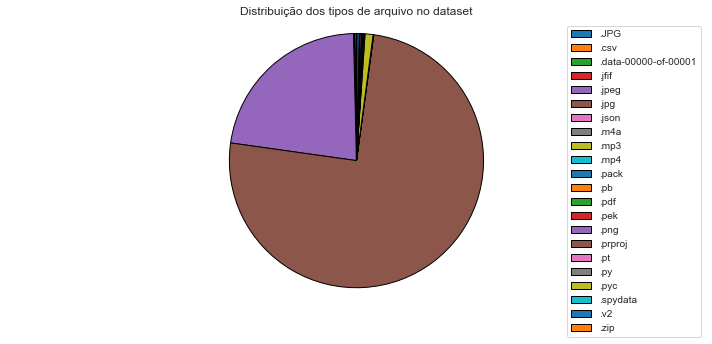

In [13]:
tipos = df['format'].drop_duplicates().values.tolist()
pizza1 = df['format'].groupby(df['format']).count()

ax = pizza1.plot.pie(figsize=(10, 5), legend=True, labels=None, startangle=90, wedgeprops = { 'linewidth': 1, "edgecolor" :"k" })
plt.ylabel(None)
plt.xlabel(None)

plt.title("Distribuição dos tipos de arquivo no dataset");
plt.gca().axis("equal");
plt.tight_layout()

# d) Discussão